# Datenauswertung

In [18]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#from pre_processing import *
import ipywidgets 

## rein elastisches Materialverhalten

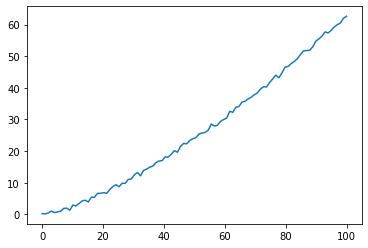

In [21]:
#m_slider = ipywidgets.IntSlider(value=1.4, min=1,max=2, step=0.1)
n_points = 100
fit_range= [0.3, 0.95]
h_max = 100 #[nm]
alpha = 0.1
m = 1.4
h_f = 0
noise_std_P = 0.5
noise_P = np.random.normal(0,noise_std_P,n_points)
noise_std_h = 0.1
noise_h = np.random.normal(0,noise_std_h, n_points)

h = np.linspace(0, h_max, n_points)#[nm]
P = alpha*(h - h_f)**m+noise_P     #[nN]
P = alpha*(h - h_f)**m+noise_P     #[nN]
plt.plot(h , P)


def plotting(m):
    P = alpha*(h - h_f)**m+noise_P     #[nN]
    plt.plot(h , P)
    
#ipywidgets.interact(plotting, m=m_slider)


power-law Kurvenfitting

In [22]:
popt_log, pcov_log = fitting(h, np.log(P), fit_range, (0.1, 1, 0), fit_func=func_log) 
popt_exp, pcov_exp = fitting(h, P, fit_range, (0.1,1,0), fit_func=func_exp)

In [23]:
print('Kurvenparameter (alpha, m, hf:)\n',popt_log)
print('Abweichung von Modellparametern:')
print('delta alpha=', 100*((alpha-popt_log[0])/alpha),'%')
print('delta m =', 100*((m-popt_log[1])/m),'%')
print('delta hf =', h_f-popt_log[2],'[nm]')

Kurvenparameter (alpha, m, hf:)
 [ 0.06583117  1.47912292 -3.80375147]
Abweichung von Modellparametern:
delta alpha= 34.168827416066705 %
delta m = -5.651636851177819 %
delta hf = 3.803751468591193 [nm]


## Plotten der gefitteten Kurve

O:\5-1\5-11\Messungen\2022\06_Nico_MA\05_Datenauswertung\Python\Nanoindentation Datenauswertung\pre_processing.py:124: RuntimeWarning: invalid value encountered in power
  return alpha*(reversed_piezo - h_f)**m
O:\5-1\5-11\Messungen\2022\06_Nico_MA\05_Datenauswertung\Python\Nanoindentation Datenauswertung\pre_processing.py:124: RuntimeWarning: invalid value encountered in power
  return alpha*(reversed_piezo - h_f)**m


Text(0, 0.5, 'Abweichung in [nm]')

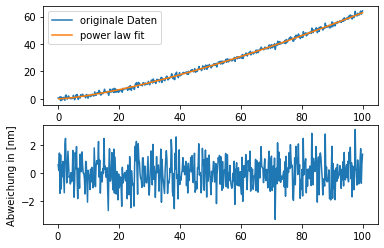

In [101]:
plt.subplot(2,1,1)
plt.plot(h, P, label = 'originale Daten')
plt.plot(h, func_exp(h, *popt_log), label = 'power law fit')
plt.legend()
plt.subplot(2,1,2)
#Residuen bestimmmen
R = P - func_exp(h, *popt_log)
plt.plot(h, R, label = 'Residuen')
plt.ylabel('Abweichung in [nm]')